# Monte Carlo Methods in RL

In typical Reinforcement Learning problem, the environment's dynamics are stochastic. Even if the action is to move up, there's a slight chance that the agent move left or right. Worse still, a series of unlikely actions might take the agent to the terminal state, giving it a huge unintended reward.


<img src="assets/unlikely_event.gif" width="400" height="40"/>

Learning how to play basketball from that gif wouldn't really help our RL agent to play like us. 
Watching a single game is not enough for a newbie agent to play like a pro. It would have to see as many events as possible until it gains enough knowledge about the environment. That's how Monte Carlo Methods work. But how does it actually work?

## Monte Carlo Approximation

I'd like to introduce how this book explains MC approximation with the area of a circle. It's surpisingly intuitive. I wrote a simple python script to add some visualisation.

<img src="assets/Keras_RL_book.JPG" width="200">
*파이썬과 케라스로 배우는 강화학습 (RL with Python and Keras)*

Let's say we have a sheet of paper (4x4). We draw a circle with a radius of 1 in the middle of it. 

In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [2]:
x_min = -2
x_max = 2
y_min = -2
y_max = 2
cx = 0
cy = 0
r = 1

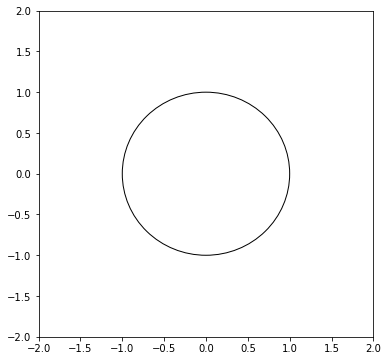

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
c1 = plt.Circle((cx, cy), radius=r, fill=False)
ax.add_artist(c1)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.show()

## Question: What is the area of the circle?

The answer is $\pi$ as the area of a circle with radius $r$ = $\pi r^2$.
We can solve this question without knowing the formula with Monte Carlo Approximation.

Monte Carlo Approximation generates a lof of random samples by which it infers the true underlying distribution.
I made a simple function `generate_random_point` that generate a random point on the paper and tell if it's inside the circle or not.

If the distance from the centre point of the circle(cx, cy) to the generated point is larger than the radius(r) then the generated point is outside the circle.

In [4]:
def generate_random_point(x_min, x_max, y_min, y_max, cx, cy, r):
    point_x = np.random.uniform(low=x_min, high=x_max)
    point_y = np.random.uniform(low=y_min, high=y_max)
    
    if np.sqrt((point_x - cx) ** 2 + (point_y - cy) ** 2) > r:
        point_class = 'out'
    else:
        point_class = 'in'
    return (point_x, point_y, point_class)

In [5]:
px, py, pc = generate_random_point(x_min, x_max, y_min, y_max, cx, cy, r)
print(px, py, pc)

-0.50183952461055 1.8028572256396647 out


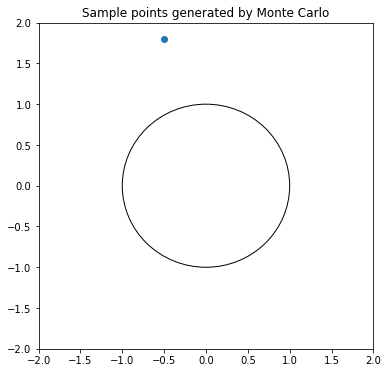

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
c1 = plt.Circle((cx, cy), radius=r, fill=False)
ax.add_artist(c1)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Sample points generated by Monte Carlo")

ax.scatter(px, py)
plt.show()

How we estimate the area of the circle is as follow.   
Denote $S(A)$ as the number of points that lie inside the circle.   
And denote $S(B)$ as the number of points that are on the paper (in this case, the total number of points).  
The ratio of the circle area to the paper area is $S(A)\over S(B)$  
Because we know the paper area ($4*4 = 16$) we can obtain the area of the circle by multiplying the ratio to the paper size.

Let's generate 100 points and see how it works.

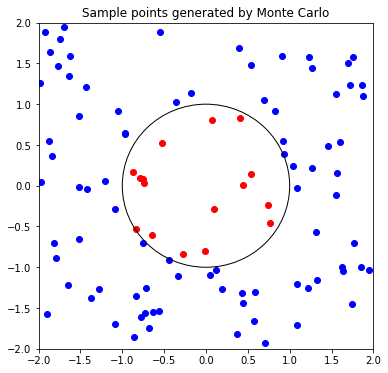

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
c1 = plt.Circle((cx, cy), radius=r, fill=False)
ax.add_artist(c1)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Sample points generated by Monte Carlo")

num_in = 0.0
num_out = 0.0
pi_area = 0.0

for i in range(100):
    (point_x, point_y, point_class) = generate_random_point(x_min, x_max, y_min, y_max, cx, cy, r)
    
    if point_class == 'in':
        color_val = 'r'
        num_in += 1
    else:
        color_val = 'b'
        num_out += 1

    pi_area = num_in / (num_in + num_out) * (x_max - x_min) * (y_max - y_min)

    ax.scatter(point_x, point_y, c=color_val)

plt.show()

In [8]:
print("total points generated: {}".format(num_in + num_out))
print("number of points in the circle: {}".format(num_in))
print("circle area: {}".format(pi_area))

total points generated: 100.0
number of points in the circle: 16.0
circle area: 2.56


Out of 100 points, 16 of them landed inside the circle (red dot). ${16\over100} * 16 = 2.56$

Wait, that doesn't look like $\pi$! 
Don't panic. Monte Carlo Approximation gets more and more accurate as the sample size goes infinity.  
This time, let's generate 10,000 points and see how MC approximates the circle area.

In [9]:
def run_MC_simulation(nb_points):
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    c1 = plt.Circle((cx, cy), radius=r, fill=False)
    ax[0].add_artist(c1)
    ax[0].set_xlim(x_min, x_max)
    ax[0].set_ylim(y_min, y_max)
    ax[0].set_title("Sample points generated by Monte Carlo")

    pi_area = 0.0
    num_in = 0.0
    num_out = 0.0

    record = []

    for i in range(0, nb_points):
        (point_x, point_y, point_class) = generate_random_point(x_min, x_max, y_min, y_max, cx, cy, r)

        if point_class == 'in':
            color_val = 'r'
            num_in += 1
        else:
            color_val = 'b'
            num_out += 1

        pi_area = num_in / (num_in + num_out) * (x_max - x_min) * (y_max - y_min)

        if i % 100 == 0:
            record.append(pi_area)
        ax[0].scatter(point_x, point_y, c=color_val, alpha=0.01)

        print("\rIteration {:05d} - circle area: {}".format(i, pi_area), end="")
        sys.stdout.flush()

    ax[1].plot(np.linspace(0, nb_points, nb_points / 100, endpoint=False), record, label='MC pi area')
    ax[1].axhline(y=3.14159265359, color='r', linestyle='--', alpha=0.5, label='true pi area')
    ax[1].set_title("iter {:05d} - Monte Carlo prediction: {}".format(i, pi_area))
    ax[1].legend()
    plt.show()


Iteration 09999 - circle area: 3.1824182718271837

/Users/junkwhinger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


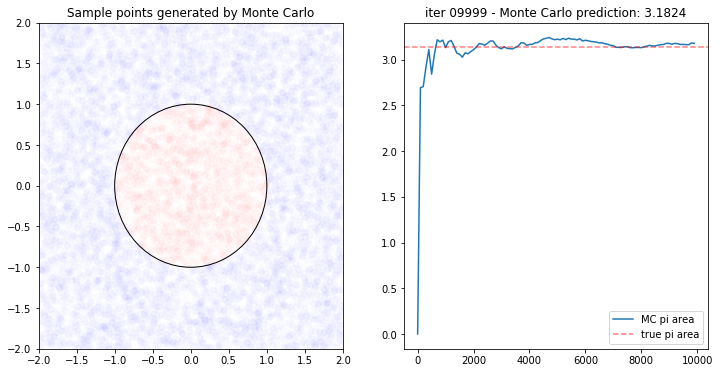

In [10]:
run_MC_simulation(10000)

Voila! The area predicted by MC is not exactly the same as $\pi$ but it's not too bad! Hope this helps you understand Monte Carlo Approximation!